In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df=pd.read_csv('datasets/tips.csv')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Las variables críticas que se consideraron para hacer este estudio fueron las variables de total_bill, tip, sex, day y time. Con estas variables se quiere realizar el estudio para responder las siguientes preguntas:
1. ¿Cuál es la variable que muestra más impacto en tips, es decir cual es la que tiene mayor correlación?¿Cómo es esta correlación?
2. ¿Se puede saber la propina que se va a dejar con alguna la variable que muestra correlación alta con tips? 
3. ¿Cuál es el día que se deja más propina?
4. ¿Cuál es el promedio de propinas que se deja a cada hora del día?
5. ¿De qué sexo van más clientes que dejan propina?

Mas adelante se va a explorar, por medio de la correlación, la relación entre las variables, su comportamiento y tendencias, en especial su relación hacia la variable de tips. 

In [3]:
#Primero se reemplazan las variables de sex, time y day por números para poder hacer la regresión 

df['sex']=df.sex.replace({'Male':1, 'Female':2})
df['time']=df.time.replace({'Lunch':1,'Dinner' :2})
df['day']=df.day.replace({'Mon':1,'Thur':2, 'Fri': 3 ,'Sat':4,'Sun': 5})

In [4]:
#Primero se indican las variables a considerar 
vars= [ 'total_bill', 'tip', 'sex', 'time','day']

In [5]:
#Se hace la limpieza de variables y se declara el dataframe a considerar
df= df[vars].dropna()
df

,total_bill,tip,sex,time,day
0,16.99,1.01,2,2,5
1,10.34,1.66,1,2,5
2,21.01,3.50,1,2,5
3,23.68,3.31,1,2,5
4,24.59,3.61,2,2,5
...,...,...,...,...,...
239,29.03,5.92,1,2,4
240,27.18,2.00,2,2,4
241,22.67,2.00,1,2,4
242,17.82,1.75,1,2,4


**Pregunta 1**

¿Cuál es la variable que muestra más impacto en tips, es decir cual es la que tiene mayor correlación?¿Cómo es esta correlación?



Para saber que variables pueden tener algun impacto en los tips y utilizarlas en la regresión lineal se debe llevar a cabo un estudio de correlación entre variables. 

In [6]:
cc=df[['tip','total_bill','sex','time','day']].corr()
cc

,tip,total_bill,sex,time,day
tip,1.000000,0.675734,-0.088862,0.121629,0.135499
total_bill,0.675734,1.000000,-0.144877,0.183118,0.173693
sex,-0.088862,-0.144877,1.000000,-0.205231,-0.230791
time,0.121629,0.183118,-0.205231,1.000000,0.874366
day,0.135499,0.173693,-0.230791,0.874366,1.000000


Se puede notar que todas las variables tienen una correlación pequeña con tip, la que tiene la correlación que se acerca más a 1 es total_bill, con una fuerza de correlación alta, por lo que es la variable que se va a considerar para hacer la recta de regresión. Para visualizar y entender mejor la correlación se realizará un diagrama de disperción.  

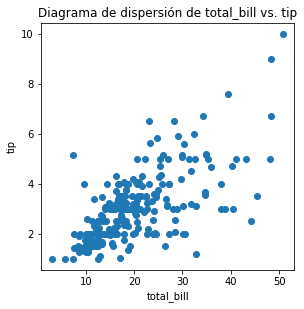

In [7]:
total_bill = df['total_bill']
tip = df['tip']

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=total_bill,
            y=tip)
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.title("Diagrama de dispersión de total_bill vs. tip")


plt.show()

Se puede notar que tiene una correlación positiva, pero si existen ciertos datos que se encuentran lejos de la recta de regresión, los cuales se pueden considerar como datos atípicos. 


**Pregunta 2**

¿Se puede saber la propina que se va a dejar con alguna la variable que muestra correlación alta con tips? 


Ya con con los datos necesarios se puede llevar a cabo la prueba
La ecuación que se quiere realizar es la siguiente
tip= b0+total_bill(b1)
Solo se utiliza la variable total_bill porque es la que mostró correlación alta


In [8]:
import statsmodels.api as sm
model= sm.OLS.from_formula('tip~total_bill', 
                          data=df)
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           6.69e-34
Time:                        13:45:16   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ya con esto se puede realizar la recta de regresión lineal para hacer las predicciones. 
Es reultado es: tips= 0.9203+total_bill(0.1050) 
No obstante se puede observar que la r cuadrada de 0.457, lo cual significa que la ecuación no es confiable, para qu elo sea debe tener un valor arriba de 0.7. 
A pesar de esto se llevará a cabo el estudio de residuos para conocer mejor el modelo. 

In [9]:
x=result.fittedvalues
y= result.resid

print ('Fitted Values are: ')
print (x)
print ('Residuals are: ' )
print (y)

Fitted Values are: 
0      2.704636
1      2.006223
2      3.126835
3      3.407250
4      3.502822
         ...   
239    3.969131
240    3.774836
241    3.301175
242    2.791807
243    2.892630
Length: 244, dtype: float64
Residuals are: 
0     -1.694636
1     -0.346223
2      0.373165
3     -0.097250
4      0.107178
         ...   
239    1.950869
240   -1.774836
241   -1.301175
242   -1.041807
243    0.107370
Length: 244, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

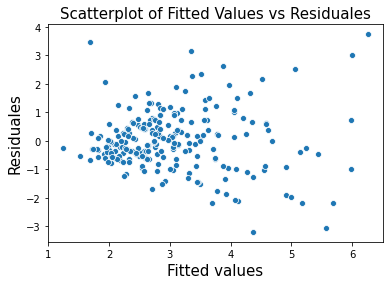

In [10]:
pp= sns.scatterplot(x=result.fittedvalues,
                   y= result.resid)
pp.set_xlabel('Fitted values',
             size=15)

pp.set_ylabel('Residuales',
             size=15)
pp.set_title('Scatterplot of Fitted Values vs Residuales',
            size=15)
plt.show

En la gráfica se puede notar que la regresión no es confiable, pues los datos no están distruibuidos de forma simétrica. 

Para responder la pregunta, se puede decir que con las variables y datos considerados no se puede realizar una predicción confiable de cuanto será la propina. 

**Pregunta 3**

¿Cuál es el día que se deja más propina?

Esta pregunta se va a contestar por medio de un pie chart que muestre que porcentaje de la propina final que se deja por día. 

In [11]:
df['day']=df.day.replace({1:'Mon',2:'Thur', 3:'Fri' ,4:'Sat',5: 'Sun'})
df_day= df.groupby('day',
                         axis=0).sum()
df_day


,total_bill,tip,sex,time
day,,,,
Fri,325.88,51.96,28,31
Sat,1778.40,260.40,115,174
Sun,1627.16,247.39,94,152
Thur,1096.33,171.83,94,63


<function matplotlib.pyplot.show(*args, **kw)>

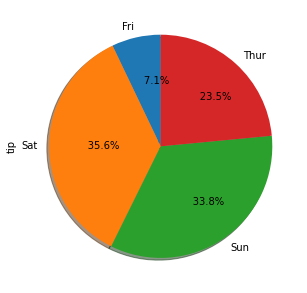

In [12]:


df_day['tip'].plot(kind= 'pie',
                           figsize=(5,6),
                           autopct= '%10.1f%%',
                           startangle=90,
                           shadow= True
                           )
plt.show

Con la gráfica de pie se puede notar que del total de propinas, el día que más se dejó propina es es el Sábado, pues se dejó el 35.6% de las propinas total. El siguiente día con mayor propina fue el Domingo con 33.8%. 

**Pregunta 4**

¿Cuál es el promedio de propinas que se deja a cada hora del día?

Para contestar esta pregunta simplemente se agrupan los datos por hora del día y se saca el promedio

In [13]:
df['time']=df.time.replace({1:'Lunch', 2 :'Dinner'})
df_time= df.groupby('time',
                         axis=0).mean()
df_time



,total_bill,tip,sex
time,,,
Dinner,20.797159,3.102670,1.295455
Lunch,17.168676,2.728088,1.514706


Se puede notar que el promedio de propinas es en Lunch es 2.73 y en Dinner es 3.10, por lo que se puede creer que el a la hora de la cena se dejan mayores propinas. 


**Pregunta 5**
¿De qué sexo van más clientes que dejan propina?

Para contestar esta pregunta se va a realizar un histograma con la frecuencia que asisten clientes de cada sexo. 

In [14]:
sex = df['sex']
df['sex']=df.sex.replace({1:'Male', 2:'Female'})

Text(0.5, 1.0, 'Millas por galón')

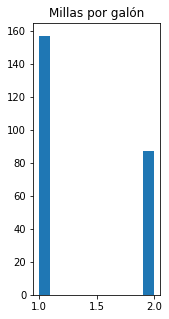

In [15]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.hist(x = sex, bins = 10)
plt.title("Millas por galón")

Con el histograma se puede notar que en total, son más hombres que mujeres quede dejan propina. Mujeres van alrededor de 90, mientras hombres son alrededor de 160.

# Stakeholders

Este tipo de información le puede interesar a:
- Meseros
- Restaurantes
- Clientes 

# Conclusión 

A traves de esta Situación Problema se pudo explorar las diferentes herramientas que se pueden utilizar para hacer estudios de datos utilizando visualizaciones a través de Python y la programación. 
Con esta base de datos se logró observar que, de las variables consideradas, la que muestra mayor correlación con la propina que se deja es la de total_bill, por lo que esta se utilizó para sacar una ecuación de regresión lineal que pueda predecir la propina. No obstante, se obtuvo que el error de la regresión fue de 0.457, lo cual significa que no es una ecuación confiable. También se logró observar a que hora del día se deja más propina y si son más hombres o mujeres los que dejan la propina. 
La visualización de datos es una herramienta estadística muy importante que ayuda mucho a entender y analizar mejor los datos, por lo que todo lo aprendido es de gran valor y muy útil para la vida profesional. 